In [1]:
import numpy as np
import IPython.display as ipd
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

# simple sin
sr = 22050 # sample rate
T = 10.0    # seconds
freq = 196
t = np.linspace(0, T, int(T*sr), endpoint=False) # linspace returns evenly spaced numbers
x = np.sin(2*np.pi*freq*t)
print(len(x))

# interrupted sin
n=1
z=x
for i in range(int(sr*T)):
    if n*sr<i and i<(n+1)*sr:
        z[i] = 0
    if i>(n+1)*sr:
        n=n+2
        
ipd.Audio(z, rate=sr)

220500


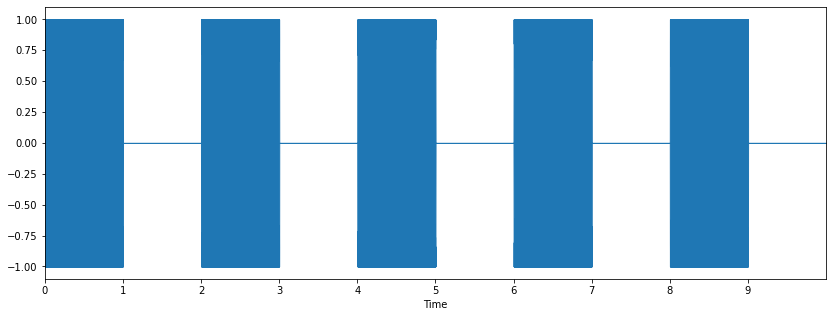

In [2]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(z, sr=sr)
plt.show()

In [3]:
# возможные параметры: время задержки, скорость убывания
dt = 0.5 # 500 ms
def echo(x, sr):
    x_echo1 = np.zeros(len(x))
    x_echo2 = np.zeros(len(x))
    for i in range(len(x)-int(sr*dt)):
        x_echo1[i+int(sr*dt)] = 0.5*x[i]
    for i in range(len(x)-2*int(sr*dt)):
        x_echo2[i+2*int(sr*dt)] = 0.25*x[i]
    x = x + x_echo1 + x_echo2
    return x

z = echo(z,sr)
ipd.Audio(z, rate=sr)

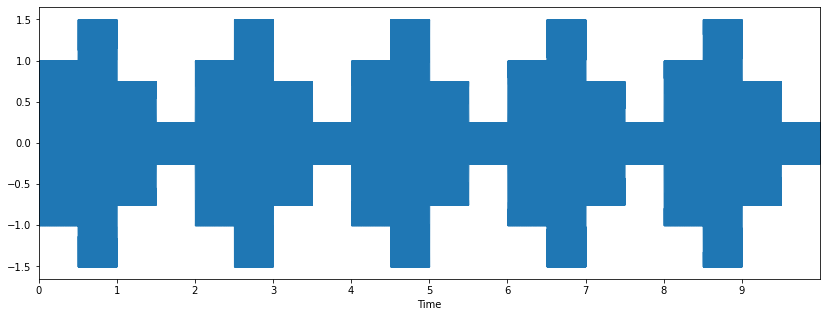

In [4]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(z, sr=sr)
plt.show()

In [5]:
ipd.Audio('Strummed Acoustic 04_mono.wav')

In [6]:
from scipy.io import wavfile

f_d, sound = wavfile.read('Strummed Acoustic 04_mono.wav')
sound = np.array(sound, dtype="int16")
sound = echo(sound, f_d)
ipd.Audio(sound, rate = f_d)

In [7]:
ipd.Audio('acoustic.wav')

In [8]:
f_d, sound = wavfile.read('acoustic.wav')
sound = np.array(sound, dtype="int16")
sound = echo(sound, f_d)
ipd.Audio(sound, rate = f_d)